# Introduction and Business Problem

## Introduction

* Just image you have a successful restaurant in Manhattan / New York City. Now it is time to expend your business. Therefore you want to bring your business idea to Toronto. But in which area should you open your venue?

## Business Problem

* For this project I will analysis the area of Toronto regarding:

        - density of restaurants in each area
        - the population (Number, type [young, middle aged, old]) and income of the areas
        - areas which has a high numbers of restaurants

        
* After the statistical analysis I will cluster the areas based on their similarities.

* Throughout those information the entrepreneur can decide which areas of Toronto suits for his type of restaurant. 

## Data Required

* Foursquare API to find out more about:
        - Venue Name
        - Venue ID
        - Venue Location
        - Venue Category
        - Count of Likes
  
* Dataset of the demography to find out more about:
        - population 
        - income

## Data Acquisition Approach

* Using geolocator to get lat and long coordinates of Toronto
* Using Foursqure API for restaurant information in each area
* Using opensource dataset of demography to gain knowledge of population and income (https://open.toronto.ca/dataset/wellbeing-toronto-demographics/)


## Data Usage Approach - Clustering

* Statistical analysis for data wrangling 
* kMeans Cluster algorithm that groups areas into cluster to find easily the area which suits your restaurant idea. 

Per Example if you have a high class restaurant, you probably look for areas which has a big income and a more older population. Still you would like to be in a area which has a high frequency and are known for good restaurants. Elsewise, if you want to open a fast food pizza place you might look for an area which has a high population of young people.

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 25.9MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 31.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.6MB/s  eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### First lets read in all datasets gerequired

In [3]:
df_neigh = gpd.read_file('Neighbourhoods.geojson')
df_pop = pd.read_excel('wellbeing-toronto-population.xlsx')
df_income = pd.read_excel('wellbeing-toronto-demographics.xlsx')
df_popchange = pd.read_excel('wellbeing-toronto-change.xlsx')

### Now lets clean all datasets up and merge them

In [4]:
df_neigh.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4621,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,4622,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,4623,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,4624,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,4625,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [5]:
df_neigh_clean = df_neigh[['AREA_NAME', 'LONGITUDE', 'LATITUDE']]

In [6]:
df_neigh_clean.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Wychwood (94),-79.425515,43.676919
1,Yonge-Eglinton (100),-79.403590,43.704689
2,Yonge-St.Clair (97),-79.397871,43.687859
3,York University Heights (27),-79.488883,43.765736
4,Yorkdale-Glen Park (31),-79.457108,43.714672


In [7]:
df_neigh_clean.dtypes

AREA_NAME     object
LONGITUDE    float64
LATITUDE     float64
dtype: object

In [8]:
df_neigh_clean['AREA_NAME'] = df_neigh_clean['AREA_NAME'].str.split("(", n = 0, expand = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_neigh_clean.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Wychwood,-79.425515,43.676919
1,Yonge-Eglinton,-79.403590,43.704689
2,Yonge-St.Clair,-79.397871,43.687859
3,York University Heights,-79.488883,43.765736
4,Yorkdale-Glen Park,-79.457108,43.714672


In [10]:
df_neigh_clean['AREA_NAME'] = df_neigh_clean['AREA_NAME'].str.rstrip()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_neigh_clean.rename(columns = {'AREA_NAME': 'Neighborhood', 'LONGITUDE': 'Longitude', 'LATITUDE': 'Latitude'}, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_neigh_clean = df_neigh_clean[['Neighborhood','Latitude','Longitude']]
df_neigh_clean.head()

,Neighborhood,Latitude,Longitude
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108


In [13]:
df_neigh_clean.to_csv('check3.csv')

In [14]:
df_pop.head()

,NeighbourhoodID,Neighbourhood,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,25 to 29 years,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,1.0,West Humber-Clairville,1540.0,5060.0,1720.0,1790.0,5.0,2325.0,3120.0,2785.0,...,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,2.0,Mount Olive-Silverstone-Jamestown,2190.0,7090.0,2500.0,2415.0,0.0,2585.0,2655.0,2400.0,...,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,3.0,Thistletown-Beaumond Heights,540.0,1730.0,600.0,595.0,5.0,650.0,760.0,680.0,...,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,4.0,Rexdale-Kipling,560.0,1640.0,515.0,565.0,0.0,635.0,720.0,715.0,...,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,5.0,Elms-Old Rexdale,540.0,1805.0,605.0,660.0,0.0,690.0,750.0,600.0,...,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


In [15]:
df_pop.dtypes

NeighbourhoodID                                  float64
Neighbourhood                                     object
0 to 04 years                                    float64
0 to 14 years                                    float64
05 to 09 years                                   float64
10 to 14 years                                   float64
100 years and over                               float64
15 to 19 years                                   float64
20 to 24 years                                   float64
25 to 29 years                                   float64
30 to 34 years                                   float64
35 to 39 years                                   float64
40 to 44 years                                   float64
50 to 54 years                                   float64
55 to 59 years                                   float64
55 years and over                                float64
60 to 64 years                                   float64
65 to 69 years                 

In [16]:
#lets get a consistancy into the dataframe 
df_pop.drop(['NeighbourhoodID', '0 to 04 years', '05 to 09 years', '100 years and over', '55 years and over', '65 years and over', '85 years and over', 'Total Population - All Age Groups - 100% data'], axis = 1, inplace = True)

In [17]:
df_pop.head()

,Neighbourhood,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years
0,West Humber-Clairville,5060.0,1790.0,2325.0,3120.0,2785.0,2345.0,2035.0,1980.0,2475.0,2195.0,1795.0,1595.0,1185.0,885.0,700.0,400.0,160.0,50.0
1,Mount Olive-Silverstone-Jamestown,7090.0,2415.0,2585.0,2655.0,2400.0,2250.0,2185.0,2275.0,2190.0,1955.0,1520.0,1285.0,885.0,630.0,465.0,225.0,70.0,10.0
2,Thistletown-Beaumond Heights,1730.0,595.0,650.0,760.0,680.0,715.0,665.0,610.0,770.0,660.0,535.0,490.0,375.0,335.0,320.0,225.0,100.0,20.0
3,Rexdale-Kipling,1640.0,565.0,635.0,720.0,715.0,680.0,640.0,680.0,815.0,870.0,650.0,520.0,350.0,295.0,270.0,205.0,85.0,15.0
4,Elms-Old Rexdale,1805.0,660.0,690.0,750.0,600.0,575.0,550.0,540.0,755.0,730.0,525.0,415.0,305.0,235.0,180.0,105.0,40.0,5.0


In [18]:
#young people below 30
df_pop_young = df_pop[['Neighbourhood', '0 to 14 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years']]
df_pop_young['Young'] = df_pop_young.sum(axis = 1)
df_pop_young.dropna(subset = ['0 to 14 years'], axis = 0, inplace = True)
df_pop_young.drop(['0 to 14 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years'], axis = 1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [19]:
df_pop_young

,Neighbourhood,Young
0,West Humber-Clairville,15080.0
1,Mount Olive-Silverstone-Jamestown,17145.0
2,Thistletown-Beaumond Heights,4415.0
3,Rexdale-Kipling,4275.0
4,Elms-Old Rexdale,4505.0
...,...,...
135,West Hill,11975.0
136,Woburn,24470.0
137,Eglinton East,10155.0
138,Scarborough Village,7880.0


In [20]:
#middle aged people between 30 and 60
df_pop_middle = df_pop[['Neighbourhood', '30 to 34 years', '35 to 39 years', '40 to 44 years', '50 to 54 years', '55 to 59 years']]
df_pop_middle['Middle Age'] = df_pop_middle.sum(axis = 1)
df_pop_middle.dropna(subset = ['30 to 34 years'], axis = 0, inplace = True)
df_pop_middle.drop(['30 to 34 years', '35 to 39 years', '40 to 44 years', '50 to 54 years', '55 to 59 years'], axis = 1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [21]:
df_pop_middle

,Neighbourhood,Middle Age
0,West Humber-Clairville,11030.0
1,Mount Olive-Silverstone-Jamestown,10855.0
2,Thistletown-Beaumond Heights,3420.0
3,Rexdale-Kipling,3685.0
4,Elms-Old Rexdale,3150.0
...,...,...
135,West Hill,9100.0
136,Woburn,17830.0
137,Eglinton East,7655.0
138,Scarborough Village,5610.0


In [22]:
#old people 60 years and above
df_pop_old = df_pop[['Neighbourhood', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years']]
df_pop_old['Old'] = df_pop_old.sum(axis = 1)
df_pop_old.dropna(subset = ['60 to 64 years'], axis = 0, inplace = True)
df_pop_old.drop(['60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years'], axis = 1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [23]:
df_pop_old

,Neighbourhood,Old
0,West Humber-Clairville,6770.0
1,Mount Olive-Silverstone-Jamestown,5090.0
2,Thistletown-Beaumond Heights,2400.0
3,Rexdale-Kipling,2390.0
4,Elms-Old Rexdale,1810.0
...,...,...
135,West Hill,5960.0
136,Woburn,10770.0
137,Eglinton East,4785.0
138,Scarborough Village,3165.0


In [24]:
df_pop_merge = pd.merge(df_pop_young, df_pop_middle, on = 'Neighbourhood')

In [25]:
df_pop_merge = pd.merge(df_pop_merge, df_pop_old, on = 'Neighbourhood')

In [26]:
df_pop_merge

,Neighbourhood,Young,Middle Age,Old
0,West Humber-Clairville,15080.0,11030.0,6770.0
1,Mount Olive-Silverstone-Jamestown,17145.0,10855.0,5090.0
2,Thistletown-Beaumond Heights,4415.0,3420.0,2400.0
3,Rexdale-Kipling,4275.0,3685.0,2390.0
4,Elms-Old Rexdale,4505.0,3150.0,1810.0
...,...,...,...,...
135,West Hill,11975.0,9100.0,5960.0
136,Woburn,24470.0,17830.0,10770.0
137,Eglinton East,10155.0,7655.0,4785.0
138,Scarborough Village,7880.0,5610.0,3165.0


In [27]:
df_pop_merge['Total'] = df_pop_merge.sum(axis = 1)

In [28]:
df_pop_merge

,Neighbourhood,Young,Middle Age,Old,Total
0,West Humber-Clairville,15080.0,11030.0,6770.0,32880.0
1,Mount Olive-Silverstone-Jamestown,17145.0,10855.0,5090.0,33090.0
2,Thistletown-Beaumond Heights,4415.0,3420.0,2400.0,10235.0
3,Rexdale-Kipling,4275.0,3685.0,2390.0,10350.0
4,Elms-Old Rexdale,4505.0,3150.0,1810.0,9465.0
...,...,...,...,...,...
135,West Hill,11975.0,9100.0,5960.0,27035.0
136,Woburn,24470.0,17830.0,10770.0,53070.0
137,Eglinton East,10155.0,7655.0,4785.0,22595.0
138,Scarborough Village,7880.0,5610.0,3165.0,16655.0


In [29]:
# lets change it into percentage
ages = ['Young', 'Middle Age', 'Old']

for age in ages:
    df_pop_merge[age] = ((df_pop_merge[age] / df_pop_merge['Total'])*100)
    df_pop_merge[age] = round(df_pop_merge[age], 2)

In [30]:
df_pop_merge.rename(columns = {'Young': 'Young [%]', 'Middle Age': 'Middle Age [%]', 'Old': 'Old [%]'}, inplace = True)

In [31]:
df_pop_merge.head()

,Neighbourhood,Young [%],Middle Age [%],Old [%],Total
0,West Humber-Clairville,45.86,33.55,20.59,32880.0
1,Mount Olive-Silverstone-Jamestown,51.81,32.80,15.38,33090.0
2,Thistletown-Beaumond Heights,43.14,33.41,23.45,10235.0
3,Rexdale-Kipling,41.30,35.60,23.09,10350.0
4,Elms-Old Rexdale,47.60,33.28,19.12,9465.0


In [32]:
df_popchange.head()

,HoodID,Neighbourhood,Pop2016,Pop2011,PopChg11t16
0,1,West Humber-Clairville,33312,34100,-0.023109
1,2,Mount Olive-Silverstone-Jamestown,32954,32788,0.005063
2,3,Thistletown-Beaumond Heights,10360,10138,0.021898
3,4,Rexdale-Kipling,10529,10488,0.003909
4,5,Elms-Old Rexdale,9456,9550,-0.009843


In [33]:
df_popchange = df_popchange[['Neighbourhood', 'PopChg11t16']]

In [34]:
df_popchange.rename(columns = {'PopChg11t16': 'Change in Population'}, inplace = True)

In [35]:
df_popchange

,Neighbourhood,Change in Population
0,West Humber-Clairville,-0.023109
1,Mount Olive-Silverstone-Jamestown,0.005063
2,Thistletown-Beaumond Heights,0.021898
3,Rexdale-Kipling,0.003909
4,Elms-Old Rexdale,-0.009843
...,...,...
135,West Hill,0.031830
136,Woburn,0.002530
137,Eglinton East,-0.002322
138,Scarborough Village,0.006924


In [36]:
df_income.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Home Repairs Needed,Tenant Average Rent,Low Income Families,Low Income Singles,Low Income Children,Family Income Category,Average Family Income,Household Income Category,Pre-Tax Household Income,After-Tax Household Income
0,West Humber-Clairville,1,30.09,32265,16295,15960,2005,2135,2325,2180,...,365,850,7720,725,643,7720,67240,8960,63415,63977
1,Mount Olive-Silverstone-Jamestown,2,4.60,32130,15900,16230,2680,2680,2685,2285,...,980,875,7715,1177,1206,7720,52745,9265,48145,49601
2,Thistletown-Beaumond Heights,3,3.40,9925,4900,5035,615,625,645,630,...,185,875,2520,305,161,2520,71300,3150,55030,54910
3,Rexdale-Kipling,4,2.50,10725,5205,5525,580,645,665,640,...,300,835,2780,653,135,2775,65215,3880,52430,53779
4,Elms-Old Rexdale,5,2.90,9440,4615,4820,725,700,745,655,...,320,895,2560,255,328,2555,56515,3130,53780,55054


In [37]:
df_income = df_income[['Neighbourhood', '   After-Tax Household Income']]

In [38]:
df_income.rename(columns = {'   After-Tax Household Income': 'Income/Household'}, inplace = True)

In [39]:
df_income

,Neighbourhood,Income/Household
0,West Humber-Clairville,63977
1,Mount Olive-Silverstone-Jamestown,49601
2,Thistletown-Beaumond Heights,54910
3,Rexdale-Kipling,53779
4,Elms-Old Rexdale,55054
...,...,...
135,West Hill,49341
136,Woburn,51539
137,Eglinton East,44772
138,Scarborough Village,45109


### Statistical Analysis

In [40]:
df_1 = pd.merge(df_pop_merge, df_popchange, on = 'Neighbourhood')

In [41]:
neighborhood = pd.merge(df_1, df_income, on = 'Neighbourhood')

In [42]:
neighborhood.head()

,Neighbourhood,Young [%],Middle Age [%],Old [%],Total,Change in Population,Income/Household
0,West Humber-Clairville,45.86,33.55,20.59,32880.0,-0.023109,63977
1,Mount Olive-Silverstone-Jamestown,51.81,32.80,15.38,33090.0,0.005063,49601
2,Thistletown-Beaumond Heights,43.14,33.41,23.45,10235.0,0.021898,54910
3,Rexdale-Kipling,41.30,35.60,23.09,10350.0,0.003909,53779
4,Elms-Old Rexdale,47.60,33.28,19.12,9465.0,-0.009843,55054


In [43]:
neighborhood['Change in Population'] = neighborhood['Change in Population']*100

In [44]:
neighborhood.rename(columns = {"Change in Population": "Change in Population [%]", "Income/Household": "Income/Household [$]"}, inplace = True)

In [45]:
neighborhood.head()

,Neighbourhood,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$]
0,West Humber-Clairville,45.86,33.55,20.59,32880.0,-2.310850,63977
1,Mount Olive-Silverstone-Jamestown,51.81,32.80,15.38,33090.0,0.506283,49601
2,Thistletown-Beaumond Heights,43.14,33.41,23.45,10235.0,2.189781,54910
3,Rexdale-Kipling,41.30,35.60,23.09,10350.0,0.390923,53779
4,Elms-Old Rexdale,47.60,33.28,19.12,9465.0,-0.984293,55054


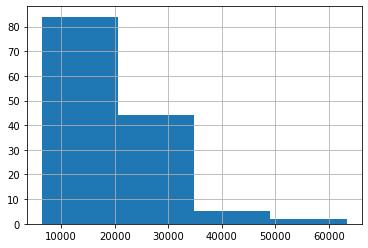

In [46]:
%matplotlib inline

neighborhood['Total'].hist(bins=4)
plt.show()

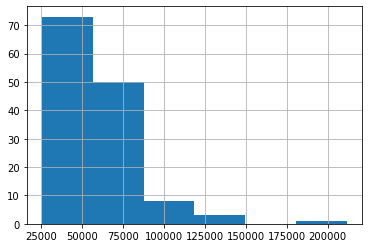

In [47]:

neighborhood['Income/Household [$]'].hist(bins = 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd21272cfd0>,
      dtype=object)

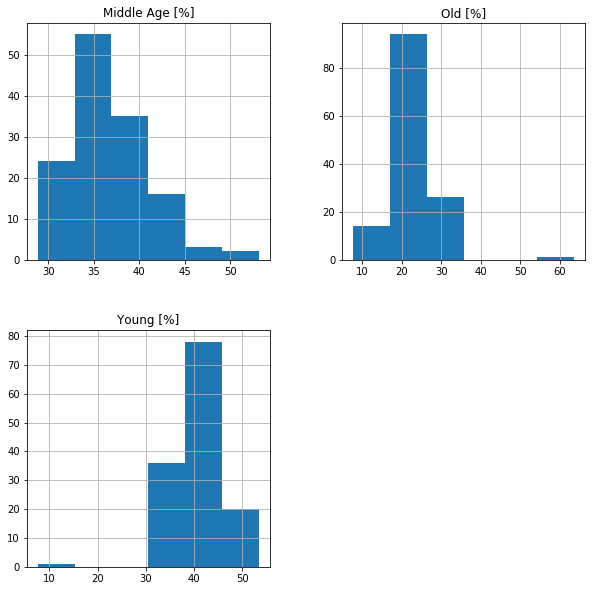

In [48]:
neighborhood[['Young [%]', 'Middle Age [%]', 'Old [%]']].hist(bins = 6, figsize = (10, 10))

## Lets see the distribution of people in average

In [50]:

young_mean = neighborhood['Young [%]'].mean()
middle_mean = neighborhood['Middle Age [%]'].mean()
old_mean = neighborhood['Old [%]'].mean()

Text(0, 0.5, 'Percentage [%]')

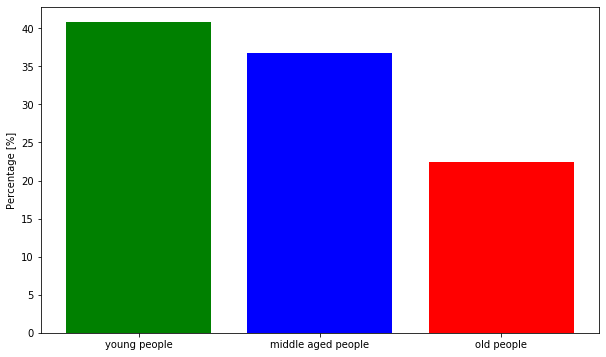

In [51]:
names = ['young people', 'middle aged people', 'old people']
values = [young_mean, middle_mean, old_mean]
plt.rcParams['figure.figsize'] = (10,6)
plt.bar(names, values , color = ['green', 'blue', 'red'])
plt.ylabel('Percentage [%]')


In [52]:
print(np.percentile(neighborhood['Income/Household [$]'], 25))
print(np.percentile(neighborhood['Income/Household [$]'], 50))
print(np.percentile(neighborhood['Income/Household [$]'], 75))

48921.0
55274.0
64768.5


In [53]:
poor = neighborhood['Income/Household [$]']<=48921.0
avg = neighborhood[(neighborhood['Income/Household [$]']>48921.0) & (neighborhood['Income/Household [$]']<=64768.5)]
rich = neighborhood['Income/Household [$]']>64768.5

In [54]:
def conditions(s):
    if s['Income/Household [$]']<=48921.0:
        return 'poor'
    if s['Income/Household [$]']<=64768.5:
        return 'avg'
    if s['Income/Household [$]']>64768.5:
        return 'rich'

neighborhood['Income group']=neighborhood.apply(conditions, axis=1)

In [55]:
neighborhood.head()

,Neighbourhood,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group
0,West Humber-Clairville,45.86,33.55,20.59,32880.0,-2.310850,63977,avg
1,Mount Olive-Silverstone-Jamestown,51.81,32.80,15.38,33090.0,0.506283,49601,avg
2,Thistletown-Beaumond Heights,43.14,33.41,23.45,10235.0,2.189781,54910,avg
3,Rexdale-Kipling,41.30,35.60,23.09,10350.0,0.390923,53779,avg
4,Elms-Old Rexdale,47.60,33.28,19.12,9465.0,-0.984293,55054,avg


In [56]:
print(np.percentile(neighborhood['Change in Population [%]'], 25))
print(np.percentile(neighborhood['Change in Population [%]'], 50))
print(np.percentile(neighborhood['Change in Population [%]'], 75))

-0.3738255438560082
1.4153458387862925
4.023881456529615


In [57]:
def conditions_c(s):
    if s['Change in Population [%]']<=1.4:
        return 'not'
    if s['Change in Population [%]']<=4.0:
        return 'lightly'
    if s['Change in Population [%]']>4.0:
        return 'trendy'

neighborhood['Trendy group']=neighborhood.apply(conditions_c, axis=1)

In [58]:
neighborhood.head()

,Neighbourhood,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group
0,West Humber-Clairville,45.86,33.55,20.59,32880.0,-2.310850,63977,avg,not
1,Mount Olive-Silverstone-Jamestown,51.81,32.80,15.38,33090.0,0.506283,49601,avg,not
2,Thistletown-Beaumond Heights,43.14,33.41,23.45,10235.0,2.189781,54910,avg,lightly
3,Rexdale-Kipling,41.30,35.60,23.09,10350.0,0.390923,53779,avg,not
4,Elms-Old Rexdale,47.60,33.28,19.12,9465.0,-0.984293,55054,avg,not


## Lets see how many neighborhoods are trendy by change in population

In [59]:
not_trendy = neighborhood['Trendy group'].str.count('not').sum()
lightly_trendy = neighborhood['Trendy group'].str.count('lightly').sum()
trendy = neighborhood['Trendy group'].str.count('trendy').sum()

Text(0, 0.5, 'Numbers of Neighborhoods')

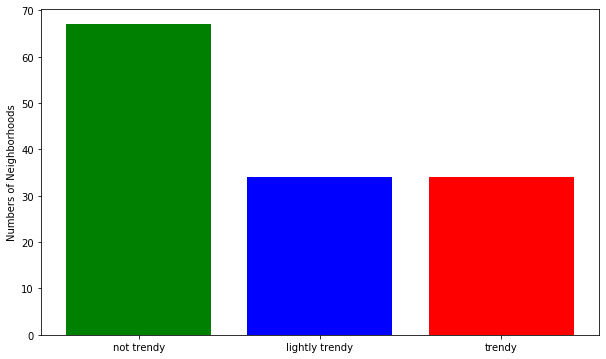

In [60]:
trendy_values = [not_trendy, lightly_trendy, trendy]
trendy_names = ['not trendy', 'lightly trendy', 'trendy']
plt.rcParams['figure.figsize'] = (10,6)
plt.bar(trendy_names, trendy_values , color = ['green', 'blue', 'red'])
plt.ylabel('Numbers of Neighborhoods')

## Lets see how many neighboorhod are poor, avg or rich

In [61]:
poor_neigh = neighborhood['Income group'].str.count('poor').sum()
avg_neigh = neighborhood['Income group'].str.count('avg').sum()
rich_neigh = neighborhood['Income group'].str.count('rich').sum()

Text(0, 0.5, 'Numbers of Neighborhoods')

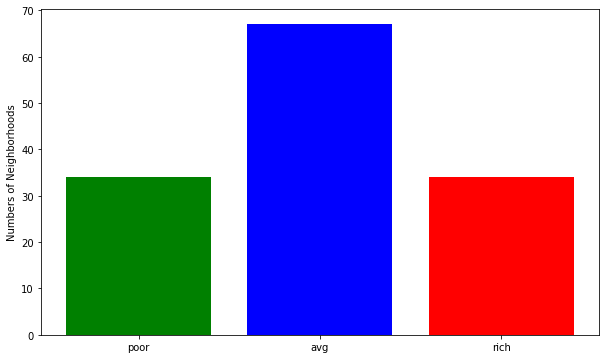

In [62]:
income_neigh = [poor_neigh, avg_neigh, rich_neigh]
name_income = ['poor', 'avg', 'rich']
plt.rcParams['figure.figsize'] = (10,6)
plt.bar(name_income, income_neigh , color = ['green', 'blue', 'red'])
plt.ylabel('Numbers of Neighborhoods')

## Foursquare API to get the amount of restaurants in each neighborhood

In [63]:
!pip install geopy

     |████████████████████████████████| 112kB 6.3MB/s eta 0:00:01


In [64]:
import json 
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [65]:
adress = 'Toronto'
geolocator = Nominatim(user_agent = "to_explorer")
location = geolocator.geocode(adress)
latitude = location.latitude
longitude = location.longitude

In [66]:
print('The geographical coordinate of Toronto are {} {}.'.format(latitude, longitude))

The geographical coordinate of Toronto are 43.6534817 -79.3839347.


In [67]:
neighborhood.rename(columns = {'Neighbourhood': 'Neighborhood'}, inplace = True)

In [69]:
toronto_data = pd.merge(df_neigh_clean, neighborhood, on = 'Neighborhood')

In [70]:
toronto_data

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group
0,Wychwood,43.676919,-79.425515,36.25,35.39,28.37,13890.0,2.595453,48776,poor,lightly
1,Yonge-Eglinton,43.704689,-79.403590,41.99,38.35,19.65,11550.0,11.712989,70362,rich,trendy
2,Yonge-St.Clair,43.687859,-79.397871,31.94,37.25,30.81,12040.0,7.518023,74323,rich,trendy
3,York University Heights,43.765736,-79.488883,47.55,34.98,17.48,27090.0,-0.433010,42816,poor,not
4,Yorkdale-Glen Park,43.714672,-79.457108,38.42,33.04,28.54,14420.0,0.796623,51404,avg,not
...,...,...,...,...,...,...,...,...,...,...,...
130,Kennedy Park,43.725556,-79.260382,41.66,36.33,22.01,16790.0,0.381053,42202,poor,not
131,Kensington-Chinatown,43.653554,-79.397240,44.67,35.16,20.17,17305.0,-2.973777,33479,poor,not
132,Kingsview Village-The Westway,43.698993,-79.547863,45.64,32.43,21.93,21910.0,1.275146,51346,avg,not
133,Kingsway South,43.653520,-79.510577,39.24,31.83,28.94,9175.0,1.101418,133039,rich,not


In [71]:
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 11)

for lat, lng, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], radius = 5, popup = label, color = 'blue', fill = True, fill_color = '#3186cc', fill_opacity = 0.7, parse_html = False).add_to(map_toronto)

In [72]:
map_toronto

In [73]:
CLIENT_ID = 'QIZA5WRA3JQNUMUTJORW442UDJUDZNFTXOLOISE3WCUOUUOP' 
CLIENT_SECRET = 'BWLKQMUZ322Y0DILUIWDJJ2NEJNV3ZAG0P3MRSBPOJ35UOFR' 
VERSION = '20200428'

LIMIT = 100
radius = 500

In [74]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [75]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Wychwood
Yonge-Eglinton
Yonge-St.Clair
York University Heights
Yorkdale-Glen Park
Lambton Baby Point
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Leaside-Bennington
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Morningside
Moss Park
Mount Dennis
Mount Olive-Silverstone-Jamestown
Mount Pleasant East
Mount Pleasant West
New Toronto
Newtonbrook East
Newtonbrook West
Niagara
North Riverdale
O'Connor-Parkview
Oakridge
Oakwood Village
Old East York
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Pleasant View
Princess-Rosethorn
Regent Park
Rexdale-Kipling
Rockcliffe-Smythe
Roncesvalles
Rosedale-Moore Park
Rouge
Runnymede-Bloor West Village
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Steeles
Stonegate-Queensway
Tam O'Shanter-Sullivan
Taylor-Massey
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Trinity-Bellwoods
University
Victoria Village
Waterfront Communities-The Island


In [76]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,Makerfaire Toronto,43.680004,-79.423805,Public Art
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


In [77]:
toronto_restaurants = toronto_venues

In [78]:
toronto_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,Makerfaire Toronto,43.680004,-79.423805,Public Art
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


In [79]:
toronto_restaurants['Restaurants'] = toronto_restaurants['Venue Category'].str.contains('Rest').copy()

In [80]:
toronto_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurants
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market,False
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space,False
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park,False
3,Wychwood,43.676919,-79.425515,Makerfaire Toronto,43.680004,-79.423805,Public Art,False
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym,False


In [81]:
toronto_restaurants = toronto_restaurants.groupby('Neighborhood', as_index = False).count()

In [82]:
toronto_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurants
0,Agincourt North,18,18,18,18,18,18,18
1,Agincourt South-Malvern West,19,19,19,19,19,19,19
2,Alderwood,7,7,7,7,7,7,7
3,Annex,24,24,24,24,24,24,24
4,Banbury-Don Mills,22,22,22,22,22,22,22


In [83]:
toronto_restaurants.dtypes

Neighborhood              object
Neighborhood Latitude      int64
Neighborhood Longitude     int64
Venue                      int64
Venue Latitude             int64
Venue Longitude            int64
Venue Category             int64
Restaurants                int64
dtype: object

In [84]:
print(np.percentile(toronto_restaurants['Restaurants'], 25))
print(np.percentile(toronto_restaurants['Restaurants'], 50))
print(np.percentile(toronto_restaurants['Restaurants'], 75))


4.0
7.0
18.75


In [85]:
def conditions_r(s):
    if s['Restaurants']<=4.0:
        return 'less'
    if s['Restaurants']<=19.0:
        return 'medium'
    if s['Restaurants']>19.0:
        return 'a lot'

toronto_restaurants['Restaurants']=toronto_restaurants.apply(conditions_r, axis=1)

In [86]:
toronto_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurants
0,Agincourt North,18,18,18,18,18,18,medium
1,Agincourt South-Malvern West,19,19,19,19,19,19,medium
2,Alderwood,7,7,7,7,7,7,medium
3,Annex,24,24,24,24,24,24,a lot
4,Banbury-Don Mills,22,22,22,22,22,22,a lot


In [87]:
toronto_restaurants.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis = 1, inplace = True)

In [88]:
toronto_restaurants.head()

,Neighborhood,Restaurants
0,Agincourt North,medium
1,Agincourt South-Malvern West,medium
2,Alderwood,medium
3,Annex,a lot
4,Banbury-Don Mills,a lot


In [89]:
toronto_final = pd.merge(toronto_data, toronto_restaurants, on = 'Neighborhood')

In [90]:
toronto_final.head()

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants
0,Wychwood,43.676919,-79.425515,36.25,35.39,28.37,13890.0,2.595453,48776,poor,lightly,less
1,Yonge-Eglinton,43.704689,-79.403590,41.99,38.35,19.65,11550.0,11.712989,70362,rich,trendy,a lot
2,Yonge-St.Clair,43.687859,-79.397871,31.94,37.25,30.81,12040.0,7.518023,74323,rich,trendy,a lot
3,York University Heights,43.765736,-79.488883,47.55,34.98,17.48,27090.0,-0.433010,42816,poor,not,medium
4,Yorkdale-Glen Park,43.714672,-79.457108,38.42,33.04,28.54,14420.0,0.796623,51404,avg,not,a lot


## Clustering

In [91]:
# lets get dummies so we can cluster
toronto_onehot = pd.get_dummies(toronto_final[['Income group', 'Trendy group', 'Restaurants']], prefix="", prefix_sep="")
toronto_onehot['Neighborhood'] = toronto_final['Neighborhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,avg,poor,rich,lightly,not,trendy,a lot,less,medium
0,Wychwood,0,1,0,1,0,0,0,1,0
1,Yonge-Eglinton,0,0,1,0,0,1,1,0,0
2,Yonge-St.Clair,0,0,1,0,0,1,1,0,0
3,York University Heights,0,1,0,0,1,0,0,0,1
4,Yorkdale-Glen Park,1,0,0,0,1,0,1,0,0


In [92]:
kclusters = 5 

toronto_grouped_clustering = toronto_onehot.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)

In [93]:

toronto_final['Cluster'] = kmeans.labels_
toronto_final.head()

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
0,Wychwood,43.676919,-79.425515,36.25,35.39,28.37,13890.0,2.595453,48776,poor,lightly,less,4
1,Yonge-Eglinton,43.704689,-79.403590,41.99,38.35,19.65,11550.0,11.712989,70362,rich,trendy,a lot,1
2,Yonge-St.Clair,43.687859,-79.397871,31.94,37.25,30.81,12040.0,7.518023,74323,rich,trendy,a lot,1
3,York University Heights,43.765736,-79.488883,47.55,34.98,17.48,27090.0,-0.433010,42816,poor,not,medium,2
4,Yorkdale-Glen Park,43.714672,-79.457108,38.42,33.04,28.54,14420.0,0.796623,51404,avg,not,a lot,3


## Lets Visualize the clusters

In [94]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Lets check the clusters out and find patterns

In [98]:
Cluster_0 = toronto_final.loc[toronto_final['Cluster']==0]

In [99]:
Cluster_0

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
5,Lambton Baby Point,43.657420,-79.496045,44.75,36.16,19.10,7855.0,0.807979,65308,rich,not,less,0
7,Lawrence Park North,43.730060,-79.403978,46.12,35.12,18.76,14310.0,0.453889,101055,rich,not,a lot,0
8,Lawrence Park South,43.717212,-79.406039,45.54,33.09,21.37,15140.0,0.723291,147629,rich,not,medium,0
9,Leaside-Bennington,43.703797,-79.366072,44.39,34.12,21.49,16545.0,-1.075774,92063,rich,not,medium,0
13,Maple Leaf,43.715574,-79.480758,39.53,34.90,25.57,9815.0,-0.843385,49086,avg,not,less,0
14,Markland Wood,43.633542,-79.573432,34.17,31.89,33.93,10300.0,1.130701,75936,rich,not,less,0
15,Milliken,43.820691,-79.275009,38.75,33.85,27.40,25950.0,-2.190157,59715,avg,not,less,0
19,Mount Olive-Silverstone-Jamestown,43.746868,-79.587259,51.81,32.80,15.38,33090.0,0.506283,49601,avg,not,less,0
23,Newtonbrook East,43.791536,-79.405937,37.53,34.70,27.78,15535.0,-1.985021,65729,rich,not,less,0
26,North Riverdale,43.671995,-79.351260,38.03,41.36,20.61,11545.0,-2.255762,69623,rich,not,medium,0


In [100]:
print('Cluster 0 \n')
print('Poor neighborhoods: ', Cluster_0['Income group'].str.count('poor').sum())
print('Average neighborhoods: ', Cluster_0['Income group'].str.count('avg').sum())
print('Rich neighborhoods: ', Cluster_0['Income group'].str.count('rich').sum())
print('Not trendy neighborhoods: ', Cluster_0['Trendy group'].str.count('not').sum())
print('lighty trendy neighborhoods: ', Cluster_0['Trendy group'].str.count('lightly').sum())
print('trendy neighborhoods: ', Cluster_0['Trendy group'].str.count('trendy').sum())
print('Less restaurants: ', Cluster_0['Restaurants'].str.count('less').sum())
print('Medium restaurants: ', Cluster_0['Restaurants'].str.count('medium').sum())
print('A lot of restaurants: ', Cluster_0['Restaurants'].str.count('a lot').sum())

Cluster 0 

Poor neighborhoods:  0
Average neighborhoods:  11
Rich neighborhoods:  20
Not trendy neighborhoods:  27
lighty trendy neighborhoods:  4
trendy neighborhoods:  0
Less restaurants:  23
Medium restaurants:  5
A lot of restaurants:  3


### Cluster 0 are neighborhoods where only rich people life but are mostly not trendy or super trendy areas with less or average amount of restaurants. 

In [101]:
Cluster_1 = toronto_final.loc[toronto_final['Cluster']==1]
Cluster_1

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
1,Yonge-Eglinton,43.704689,-79.403590,41.99,38.35,19.65,11550.0,11.712989,70362,rich,trendy,a lot,1
2,Yonge-St.Clair,43.687859,-79.397871,31.94,37.25,30.81,12040.0,7.518023,74323,rich,trendy,a lot,1
6,Lansing-Westgate,43.754271,-79.424748,41.63,39.19,19.18,15745.0,10.394755,64943,rich,trendy,less,1
10,Little Portugal,43.647536,-79.430323,40.48,43.13,16.39,15105.0,29.120332,46262,poor,trendy,a lot,1
11,Long Branch,43.592362,-79.533345,37.67,40.96,21.38,9730.0,4.692691,51608,avg,trendy,medium,1
17,Moss Park,43.656518,-79.367297,35.03,49.25,15.72,19340.0,25.757390,41833,poor,trendy,a lot,1
20,Mount Pleasant East,43.704852,-79.384924,40.70,38.41,20.89,16350.0,4.961832,81308,rich,trendy,a lot,1
22,New Toronto,43.600589,-79.510358,39.63,39.76,20.61,10940.0,5.165138,42878,poor,trendy,medium,1
25,Niagara,43.636681,-79.412420,39.16,53.11,7.73,29815.0,46.563881,65727,rich,trendy,a lot,1
33,Pelmo Park-Humberlea,43.717515,-79.528282,41.95,37.45,20.59,10440.0,23.099885,64576,avg,trendy,less,1


In [102]:
print('Cluster 1 \n')
print('Poor neighborhoods: ', Cluster_1['Income group'].str.count('poor').sum())
print('Average neighborhoods: ', Cluster_1['Income group'].str.count('avg').sum())
print('Rich neighborhoods: ', Cluster_1['Income group'].str.count('rich').sum())
print('Not trendy neighborhoods: ', Cluster_1['Trendy group'].str.count('not').sum())
print('lighty trendy neighborhoods: ', Cluster_1['Trendy group'].str.count('lightly').sum())
print('trendy neighborhoods: ', Cluster_1['Trendy group'].str.count('trendy').sum())
print('Less restaurants: ', Cluster_1['Restaurants'].str.count('less').sum())
print('Medium restaurants: ', Cluster_1['Restaurants'].str.count('medium').sum())
print('A lot of restaurants: ', Cluster_1['Restaurants'].str.count('a lot').sum())

Cluster 1 

Poor neighborhoods:  7
Average neighborhoods:  17
Rich neighborhoods:  10
Not trendy neighborhoods:  0
lighty trendy neighborhoods:  0
trendy neighborhoods:  34
Less restaurants:  11
Medium restaurants:  12
A lot of restaurants:  11


### Cluster 1 are neighborhoods where people with an average income lives. Those areas are mostly trendy or not trendy but doesn't have a lot of restaurants.  

In [103]:
Cluster_2 = toronto_final.loc[toronto_final['Cluster']==2]
Cluster_2

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
3,York University Heights,43.765736,-79.488883,47.55,34.98,17.48,27090.0,-0.433010,42816,poor,not,medium,2
29,Oakwood Village,43.688566,-79.439785,37.98,38.29,23.73,20565.0,0.650121,45550,poor,not,medium,2
39,Rockcliffe-Smythe,43.674790,-79.494420,40.53,36.36,23.12,21825.0,-0.094310,45558,poor,not,medium,2
44,Rustic,43.711609,-79.498091,46.15,30.20,23.65,9935.0,-0.100492,36827,poor,not,less,2
45,Scarborough Village,43.738652,-79.216813,47.31,33.68,19.00,16655.0,0.692396,45109,poor,not,medium,2
51,Taylor-Massey,43.694998,-79.295901,43.67,40.12,16.21,15330.0,0.570732,39240,poor,not,less,2
62,Weston,43.702716,-79.515723,43.06,36.88,20.06,17625.0,-0.979637,42670,poor,not,medium,2
81,Beechborough-Greenbrook,43.693216,-79.479473,43.30,35.09,21.61,6455.0,1.371763,38714,poor,not,less,2
84,Black Creek,43.764890,-79.521979,50.36,31.54,18.10,21795.0,-1.450787,40279,poor,not,medium,2
88,Broadview North,43.688825,-79.355630,35.06,41.94,23.00,10980.0,-0.553490,41113,poor,not,less,2


In [104]:
print('Cluster 2 \n')
print('Poor neighborhoods: ', Cluster_2['Income group'].str.count('poor').sum())
print('Average neighborhoods: ', Cluster_2['Income group'].str.count('avg').sum())
print('Rich neighborhoods: ', Cluster_2['Income group'].str.count('rich').sum())
print('Not trendy neighborhoods: ', Cluster_2['Trendy group'].str.count('not').sum())
print('lighty trendy neighborhoods: ', Cluster_2['Trendy group'].str.count('lightly').sum())
print('trendy neighborhoods: ', Cluster_2['Trendy group'].str.count('trendy').sum())
print('Less restaurants: ', Cluster_2['Restaurants'].str.count('less').sum())
print('Medium restaurants: ', Cluster_2['Restaurants'].str.count('medium').sum())
print('A lot of restaurants: ', Cluster_2['Restaurants'].str.count('a lot').sum())

Cluster 2 

Poor neighborhoods:  18
Average neighborhoods:  0
Rich neighborhoods:  0
Not trendy neighborhoods:  18
lighty trendy neighborhoods:  0
trendy neighborhoods:  0
Less restaurants:  7
Medium restaurants:  10
A lot of restaurants:  1


### Cluster 2 are neighborhoods where people mostly with an average income lives. Those areas are becoming more trendy in the last years but dont count already as trendy areas. Most of those neighborhoods has a lot of restaurants 

In [105]:
Cluster_3 = toronto_final.loc[toronto_final['Cluster']==3]
Cluster_3

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
4,Yorkdale-Glen Park,43.714672,-79.457108,38.42,33.04,28.54,14420.0,0.796623,51404,avg,not,a lot,3
12,Malvern,43.803658,-79.222517,47.07,33.63,19.29,43665.0,-2.865635,56895,avg,not,medium,3
16,Morningside,43.782399,-79.207041,45.29,32.96,21.75,17265.0,-0.750554,55939,avg,not,medium,3
31,Palmerston-Little Italy,43.659157,-79.418409,41.21,39.48,19.31,13335.0,0.581987,50205,avg,not,a lot,3
35,Pleasant View,43.786982,-79.334948,38.66,34.18,27.16,15300.0,-2.019326,61599,avg,not,medium,3
40,Roncesvalles,43.646123,-79.442992,39.53,43.35,17.12,14395.0,-0.504983,49174,avg,not,a lot,3
48,Steeles,43.812959,-79.321207,36.13,32.58,31.29,23760.0,-1.574929,57840,avg,not,medium,3
50,Tam O'Shanter-Sullivan,43.780130,-79.302919,37.97,33.01,29.02,26825.0,0.175195,53925,avg,not,medium,3
55,Trinity-Bellwoods,43.650176,-79.415342,38.81,41.76,19.42,15935.0,-1.464111,52198,avg,not,a lot,3
56,University,43.662506,-79.401180,45.33,32.66,22.02,7380.0,-2.248779,57704,avg,not,a lot,3


In [106]:
print('Cluster 3 \n')
print('Poor neighborhoods: ', Cluster_3['Income group'].str.count('poor').sum())
print('Average neighborhoods: ', Cluster_3['Income group'].str.count('avg').sum())
print('Rich neighborhoods: ', Cluster_3['Income group'].str.count('rich').sum())
print('Not trendy neighborhoods: ', Cluster_3['Trendy group'].str.count('not').sum())
print('lighty trendy neighborhoods: ', Cluster_3['Trendy group'].str.count('lightly').sum())
print('trendy neighborhoods: ', Cluster_3['Trendy group'].str.count('trendy').sum())
print('Less restaurants: ', Cluster_3['Restaurants'].str.count('less').sum())
print('Medium restaurants: ', Cluster_3['Restaurants'].str.count('medium').sum())
print('A lot of restaurants: ', Cluster_3['Restaurants'].str.count('a lot').sum())

Cluster 3 

Poor neighborhoods:  0
Average neighborhoods:  21
Rich neighborhoods:  0
Not trendy neighborhoods:  21
lighty trendy neighborhoods:  0
trendy neighborhoods:  0
Less restaurants:  0
Medium restaurants:  16
A lot of restaurants:  5


### Cluster 3 are not trendy neighborhoods where people with an average income lives. They have mostly a medium amount of restaurants.

In [107]:
Cluster_4 = toronto_final.loc[toronto_final['Cluster']==4]
Cluster_4

,Neighborhood,Latitude,Longitude,Young [%],Middle Age [%],Old [%],Total,Change in Population [%],Income/Household [$],Income group,Trendy group,Restaurants,Cluster
0,Wychwood,43.676919,-79.425515,36.25,35.39,28.37,13890.0,2.595453,48776,poor,lightly,less,4
18,Mount Dennis,43.688144,-79.499989,44.80,36.89,18.31,13405.0,3.408140,40338,poor,lightly,less,4
21,Mount Pleasant West,43.704435,-79.393360,33.44,45.45,21.11,28350.0,3.724688,49576,avg,lightly,a lot,4
24,Newtonbrook West,43.785830,-79.431422,38.83,37.05,24.13,23025.0,3.379316,51504,avg,lightly,less,4
27,O'Connor-Parkview,43.706800,-79.312228,42.33,36.58,21.08,18260.0,1.960035,49266,avg,lightly,medium,4
28,Oakridge,43.697408,-79.279708,46.01,37.10,16.89,13735.0,2.578351,32144,poor,lightly,medium,4
34,Playter Estates-Danforth,43.679700,-79.354887,38.41,39.66,21.94,7590.0,1.973082,63244,avg,lightly,a lot,4
46,South Parkdale,43.636700,-79.439338,38.06,44.69,17.25,20955.0,2.813985,29341,poor,lightly,a lot,4
52,The Beaches,43.671050,-79.299601,39.33,39.40,21.28,20940.0,2.068150,90293,rich,lightly,a lot,4
53,Thistletown-Beaumond Heights,43.737988,-79.563491,43.14,33.41,23.45,10235.0,2.189781,54910,avg,lightly,medium,4


In [108]:
print('Cluster 4 \n')
print('Poor neighborhoods: ', Cluster_4['Income group'].str.count('poor').sum())
print('Average neighborhoods: ', Cluster_4['Income group'].str.count('avg').sum())
print('Rich neighborhoods: ', Cluster_4['Income group'].str.count('rich').sum())
print('Not trendy neighborhoods: ', Cluster_4['Trendy group'].str.count('not').sum())
print('lighty trendy neighborhoods: ', Cluster_4['Trendy group'].str.count('lightly').sum())
print('trendy neighborhoods: ', Cluster_4['Trendy group'].str.count('trendy').sum())
print('Less restaurants: ', Cluster_4['Restaurants'].str.count('less').sum())
print('Medium restaurants: ', Cluster_4['Restaurants'].str.count('medium').sum())
print('A lot of restaurants: ', Cluster_4['Restaurants'].str.count('a lot').sum())

Cluster 4 

Poor neighborhoods:  9
Average neighborhoods:  18
Rich neighborhoods:  3
Not trendy neighborhoods:  0
lighty trendy neighborhoods:  30
trendy neighborhoods:  0
Less restaurants:  10
Medium restaurants:  9
A lot of restaurants:  11


### Cluster 4 are neighborhoods where only poor people lives. They are mostly no trendy areas but has medium amount of restaurants